In [95]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = r'C:\Users\sheyi\OneDrive\Documents\BuildingsProject\UCLanPrestonBldDATA.xlsx'
data = pd.ExcelFile(file_path)

# Check sheet names
print(data.sheet_names)

# Load the relevant sheet
gas_data = data.parse('GasData(kWh)')

# Display the first few rows of the dataset
gas_data.head()

['GasData(kWh)']


Site Units         Jan 10     Feb 10         Mar 10  \
0          Livesey House   kWh   61829.740000   59240.12   51277.655802   
1                Library   kWh  366652.960000  267362.37  268890.230000   
2                Kirkham   kWh  152675.310000  138026.66  116205.393742   
3  Arts Centre St Peters   kWh    7909.909665       0.00   40307.827497   
4  Computer & Technology   kWh   14401.860000   12296.36   53017.457627   

          Apr 10         May 10        Jun 10        Jul 10       Aug 10  ...  \
0   29831.212250    4409.812403   4267.560390   4409.812403  4409.812403  ...   
1  107600.040000  122853.435938  94315.526840  56337.931222  1438.696000  ...   
2   67357.212925   51917.224167   3443.529167   2673.304375  1201.442077  ...   
3   17292.850210    2111.392229   2043.282803   2111.392229  2111.392229  ...   
4    5544.573373    2690.993839   1654.021161   1270.535935  1258.654516  ...   

      Mar 20    Apr 20    May 20    Jun 20    Jul 20    Aug 20    Sep 20  \
0   27447.66    400.87      0.00      0.00      0.00      0.00      0.00   
1  108329.87  65585.08  51582.27  36278.75  37332.08  46933.91  71113.41   
2   36368.14    256.12   3930.80   1932.62   2027.38   1912.34   2558.31   
3   12441.44      0.00      0.00      0.00      0.00      0.00      0.00   
4       0.00      0.00      0.00      0.00      0.00      0.00      0.00   

     Oct 20     Nov 20     Dec 20  
0  20280.32   33409.65   37914.52  
1  94731.47  106556.01  205203.31  
2  32110.50   56987.63   68389.76  
3  11908.53   21564.41   16101.61  
4      0.00       0.00       0.00  

[5 rows x 134 columns]

In [97]:
# Filter data for Livesey House
livesey_house_data = gas_data[gas_data['Site'] == 'Livesey House']

# Drop unnecessary columns and reset index
livesey_house_data = livesey_house_data.drop(columns=['Site', 'Units']).reset_index(drop=True)

# Transpose the data for proper structure
livesey_house_data = livesey_house_data.T
livesey_house_data.columns = ['GasConsumption_kWh']

# Generate a Date column based on the time period
livesey_house_data['Date'] = pd.date_range(start='2010-01-01', periods=len(livesey_house_data), freq='ME')

# Reset index
livesey_house_data = livesey_house_data.reset_index(drop=True)

# Display the cleaned data
livesey_house_data.head()


GasConsumption_kWh       Date
0        61829.740000 2010-01-31
1        59240.120000 2010-02-28
2        51277.655802 2010-03-31
3        29831.212250 2010-04-30
4         4409.812403 2010-05-31

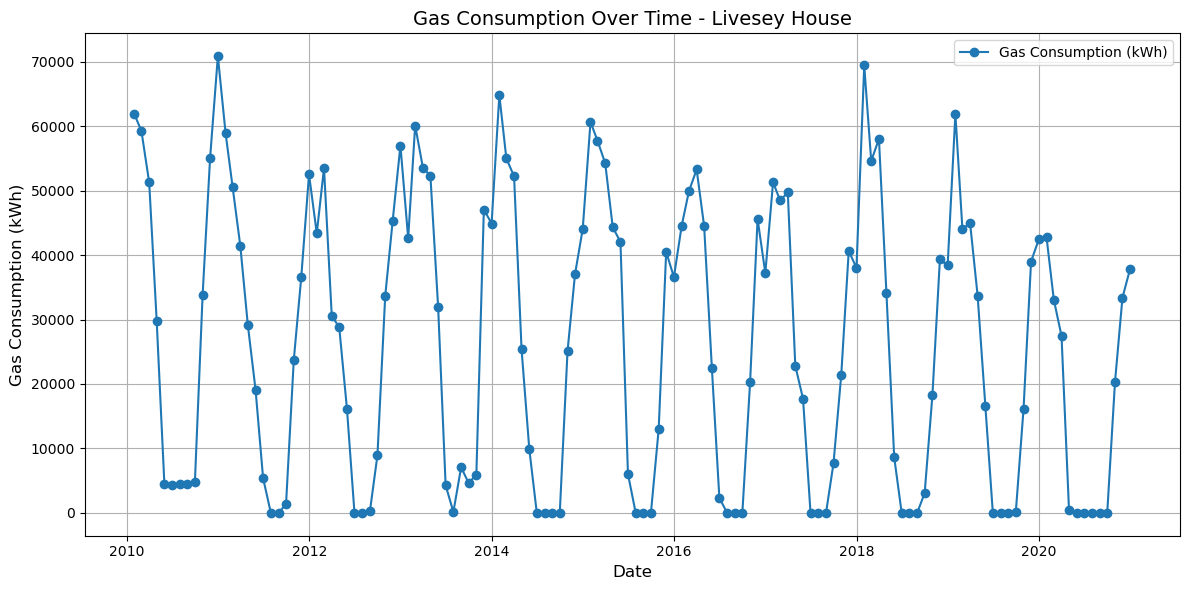

In [159]:
import matplotlib.pyplot as plt

# Plot the gas consumption for the Kirkham building
plt.figure(figsize=(12, 6))
plt.plot(Livesey_data_clean.index, Livesey_data_clean['Gas Consumption (kWh)'], 
         marker='o', linestyle='-', label='Gas Consumption (kWh)')
plt.title('Gas Consumption Over Time - Livesey House', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Gas Consumption (kWh)', fontsize=12)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

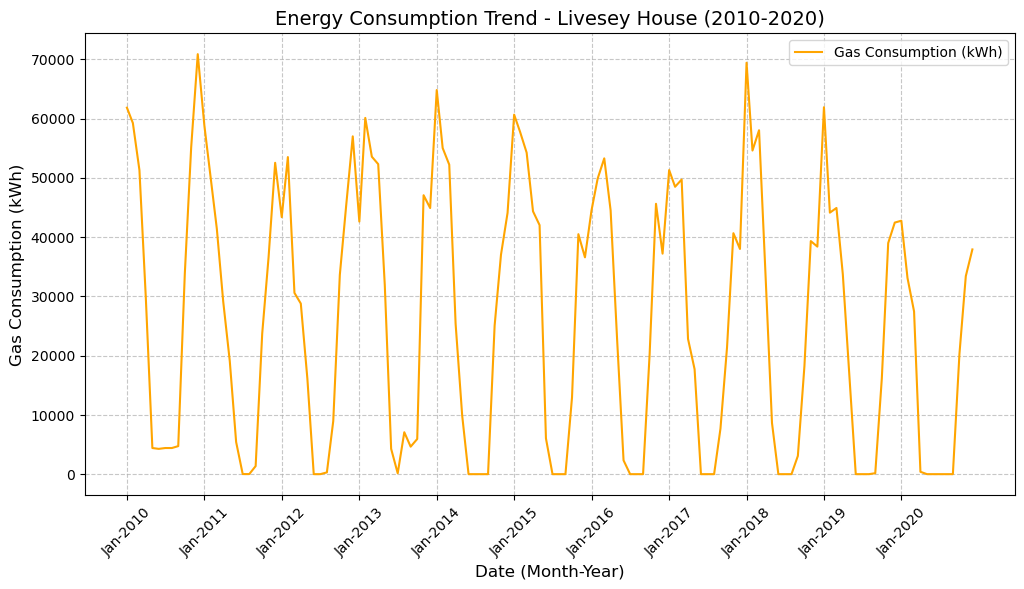

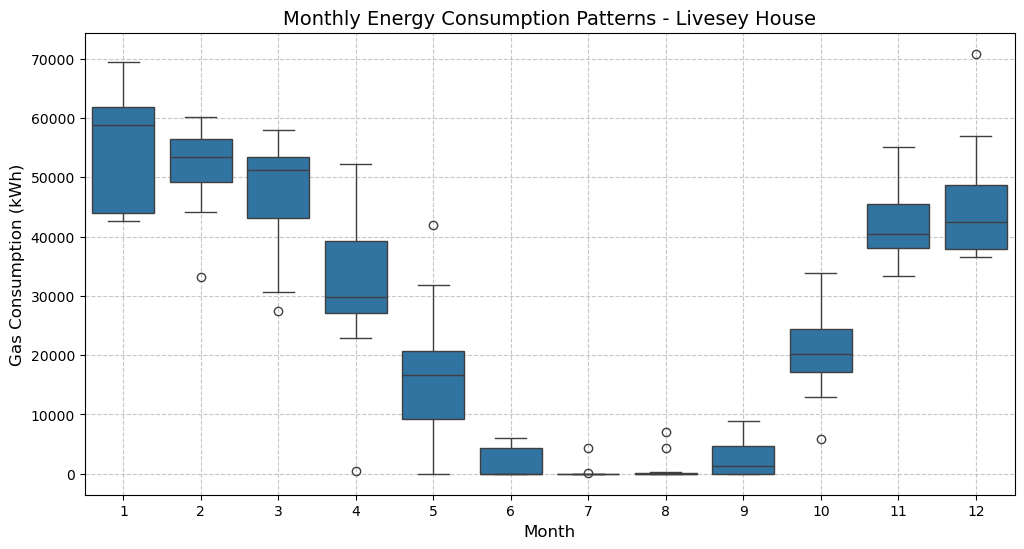

In [167]:
# Plot the trend of gas consumption over time
plt.figure(figsize=(12, 6))
plt.plot(livesey_house_data['Date'], livesey_house_data['GasConsumption_kWh'], label='Gas Consumption (kWh)', color='orange')
plt.title('Energy Consumption Trend - Livesey House (2010-2020)', fontsize=14)
plt.xlabel('Date (Month-Year)', fontsize=12)
plt.ylabel('Gas Consumption (kWh)', fontsize=12)
plt.xticks(
    ticks=livesey_house_data['Date'][::12],  # Show one tick per year
    labels=livesey_house_data['Date'][::12].dt.strftime('%b-%Y'),
    rotation=45  # Rotate for better readability
)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

# Seasonal patterns
livesey_house_data['Year'] = livesey_house_data['Date'].dt.year
livesey_house_data['Month'] = livesey_house_data['Date'].dt.month

plt.figure(figsize=(12, 6))
sns.boxplot(data=livesey_house_data, x='Month', y='GasConsumption_kWh')
plt.title('Monthly Energy Consumption Patterns - Livesey House', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Gas Consumption (kWh)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()





### Explanation of the Visualizations

#### **1. Gas Consumption Trend Over Time (2010-2020)**

This line graph visualizes the gas consumption for Livesey House on a monthly basis from January 2010 to December 2020. The x-axis represents the timeline in **month-year format** (e.g., Jan-2010, Jan-2011), while the y-axis shows the gas consumption measured in **kWh**. 

**Key Observations:**
- **Seasonal Peaks and Troughs**:
  - Gas consumption rises during the **winter months** (e.g., December, January, February), which reflects increased heating needs.
  - Conversely, consumption dips significantly during the **summer months** (e.g., June, July, August), as heating is less required.
- **Recurring Patterns:**
  - There is a consistent annual cycle where gas usage increases and decreases predictably.
- **Anomalies or Unusual Behavior:**
  - Occasional sharp drops or near-zero values (e.g., summer months) might correspond to building closures, maintenance periods, or reporting gaps.

**Insights:**
- The strong seasonal trend indicates that gas consumption is closely tied to weather conditions and heating requirements.
- Any anomalies, such as irregular consumption patterns, could provide insights into operational changes, maintenance schedules, or external factors like the COVID-19 pandemic in 2020.

#### **2. Monthly Gas Consumption Patterns**

This boxplot illustrates the distribution of gas consumption for each month over the entire time period (2010-2020). The x-axis represents the **months** (from January to December), while the y-axis represents the gas consumption in **kWh**.

**Key Observations:**
- **Seasonal Variation:**
  - **Highest consumption** is observed in the winter months (e.g., January, February, December), with large spreads indicating variability in heating needs across different years.
  - **Lowest consumption** occurs in the summer months (e.g., June, July, August), with minimal variability.
- **Month-to-Month Comparisons:**
  - The gradual decline from February to June reflects decreasing heating demands as temperatures rise.
  - The steady increase from September to December mirrors the preparation for colder months.

**Insights:**
- The boxplot highlights seasonal trends effectively, showing both the typical values and the variability for each month.
- Variability in winter months could be attributed to fluctuating weather conditions, building usage, or energy-saving measures implemented in certain years.

#### **Summary of Visualizations:**
- The **line graph** emphasizes trends over time, making it easier to identify year-to-year consistency, seasonal changes, and unusual patterns.
- The **boxplot** provides a detailed view of month-specific distributions, helping to compare consumption across months and identify variability.

Together, these visualizations offer a comprehensive understanding of Livesey House's gas consumption patterns, facilitating deeper analysis and insights into energy usage behaviors.



In [157]:

# Filter the data for Livesey House
Livesey_data = gas_data[gas_data['Site'] == 'Livesey House']

# Transpose the data to have months as a time-series format
Livesey_data_clean = Livesey_data.drop(columns=['Site', 'Units']).transpose()
Livesey_data_clean.columns = ['Gas Consumption (kWh)']

# Convert the index to datetime, assuming the columns represent monthly data
Livesey_data_clean.index = pd.date_range(start='2010-01', periods=len(Livesey_data_clean), freq='ME')

# Display the cleaned data to ensure correctness
Livesey_data_clean.head()

Gas Consumption (kWh)
2010-01-31           61829.740000
2010-02-28           59240.120000
2010-03-31           51277.655802
2010-04-30           29831.212250
2010-05-31            4409.812403

Random Forest Results (2016):
Mean Absolute Error (MAE): 4716.15 kWh
Root Mean Squared Error (RMSE): 6325.34 kWh
R² Score: 0.907
         Date  GasConsumption_kWh  Predicted_kWh
72 2016-01-31            44521.23   53301.155910
73 2016-02-29            49879.95   56888.604842
74 2016-03-31            53280.31   52675.375700
75 2016-04-30            44500.30   51522.668333
76 2016-05-31            22460.13   11954.993626
77 2016-06-30             2327.30     696.929934
78 2016-07-31                0.00     167.957842
79 2016-08-31                0.00     216.157206
80 2016-09-30                0.00     412.140019
81 2016-10-31            20254.29   29968.970141
82 2016-11-30            45611.88   46342.332309
83 2016-12-31            37202.96   47004.037802


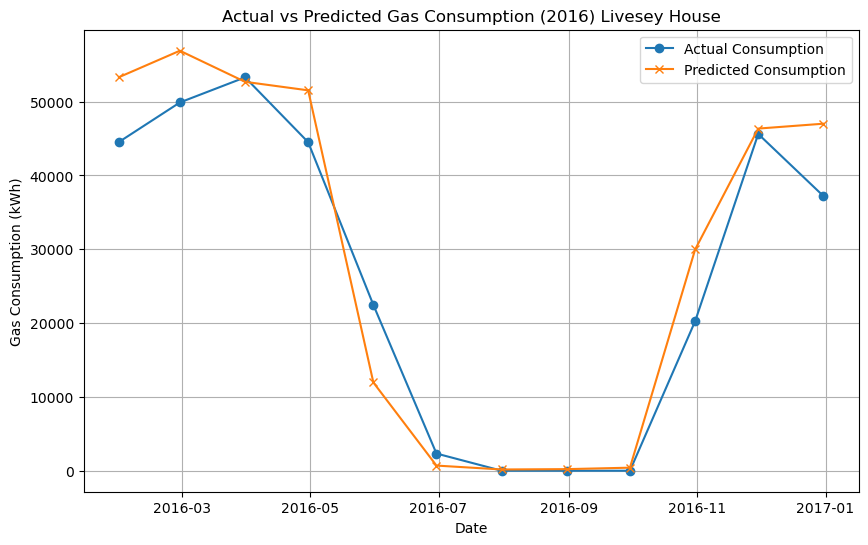

In [165]:




# Split data into training (2010–2015) and testing (2016)
train_data = livesey_house_data[livesey_house_data['Year'] <= 2015]
test_data = livesey_house_data[livesey_house_data['Year'] == 2016]

# Define features (Year, Month, Temperature) and target (Gas Consumption)
X_train = train_data[['Year', 'Month', 'Preston Temperature in C']]
y_train = train_data['GasConsumption_kWh']
X_test = test_data[['Year', 'Month', 'Preston Temperature in C']]
y_test = test_data['GasConsumption_kWh']

# Train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

# Display evaluation metrics
print(f"Random Forest Results (2016):")
print(f"Mean Absolute Error (MAE): {mae_rf:.2f} kWh")
print(f"Root Mean Squared Error (RMSE): {rmse_rf:.2f} kWh")
print(f"R² Score: {r2_rf:.3f}")

# Display predicted and actual values
predicted_vs_actual_rf = test_data.copy()
predicted_vs_actual_rf['Predicted_kWh'] = y_pred_rf
print(predicted_vs_actual_rf[['Date', 'GasConsumption_kWh', 'Predicted_kWh']])

# Visualize predicted vs actual values for 2016
plt.figure(figsize=(10, 6))
plt.plot(test_data['Date'], y_test, label='Actual Consumption', marker='o')
plt.plot(test_data['Date'], y_pred_rf, label='Predicted Consumption', marker='x')
plt.xlabel('Date')
plt.ylabel('Gas Consumption (kWh)')
plt.title('Actual vs Predicted Gas Consumption (2016) Livesey House')
plt.legend()
plt.grid(True)
plt.show()


## Random Forest Model Analysis for Livesey House (2016)

### Model Performance Metrics
The Random Forest model achieved the following performance metrics when predicting gas consumption for Livesey House in 2016:

- **Mean Absolute Error (MAE):** **4,716.15 kWh**
  - On average, the model's predictions deviate from the actual gas consumption by approximately 4,716.15 kWh.
- **Root Mean Squared Error (RMSE):** **6,325.34 kWh**
  - The RMSE penalizes larger errors more heavily, providing a measure of overall accuracy.
- **R² Score:** **0.907**
  - The model explains 90.7% of the variance in gas consumption, indicating strong predictive performance.

### Predicted vs. Actual Gas Consumption (2016)
The table below compares the actual and predicted gas consumption for Livesey House in 2016:

| **Date**       | **Actual Consumption (kWh)** | **Predicted Consumption (kWh)** |
|----------------|------------------------------|----------------------------------|
| 2016-01-31     | 44,521.23                   | 53,301.16                       |
| 2016-02-29     | 49,879.95                   | 56,888.60                       |
| 2016-03-31     | 53,280.31                   | 52,675.38                       |
| 2016-04-30     | 44,500.30                   | 51,522.67                       |
| 2016-05-31     | 22,460.13                   | 11,954.99                       |
| 2016-06-30     |  2,327.30                   |    696.93                       |
| 2016-07-31     |      0.00                   |    167.96                       |
| 2016-08-31     |      0.00                   |    216.16                       |
| 2016-09-30     |      0.00                   |    412.14                       |
| 2016-10-31     | 20,254.29                   | 29,968.97                       |
| 2016-11-30     | 45,611.88                   | 46,342.33                       |
| 2016-12-31     | 37,202.96                   | 47,004.04                       |

### Key Insights
1. **High Predictive Accuracy:**
   - The Random Forest model demonstrates strong performance with an R² score of 0.907, meaning it explains the majority of variance in the data.

2. **Seasonal Trends:**
   - The model accurately captures higher consumption during the colder months (e.g., January, February, and December).
   - Predictions for summer months (e.g., July, August, and September) align well with the near-zero actual consumption.

3. **Residual Errors:**
   - Larger prediction errors are observed for transitional months such as May and October, suggesting potential improvements by adding additional seasonal or operational features.

### Visualization
The following line plot compares the actual and predicted gas consumption for Livesey House in 2016:

- **Blue Line:** Actual consumption.
- **Orange Line:** Predicted consumption.

### Conclusion
The Random Forest model provides reliable predictions for Livesey House in 2016, accurately reflecting seasonal variations and achieving strong performance metrics. Further refinements could focus on improving predictions during transitional months to reduce residual errors further.



In [125]:
# Filter the data for the Kirkham building
kirkham_data = gas_data[gas_data['Site'] == 'Kirkham']

# Transpose the data to have months as a time-series format
kirkham_data_clean = kirkham_data.drop(columns=['Site', 'Units']).transpose()
kirkham_data_clean.columns = ['Gas Consumption (kWh)']

# Convert the index to datetime, assuming the columns represent monthly data
kirkham_data_clean.index = pd.date_range(start='2010-01', periods=len(kirkham_data_clean), freq='ME')

# Display the cleaned data to ensure correctness
kirkham_data_clean.head()


Gas Consumption (kWh)
2010-01-31          152675.310000
2010-02-28          138026.660000
2010-03-31          116205.393742
2010-04-30           67357.212925
2010-05-31           51917.224167

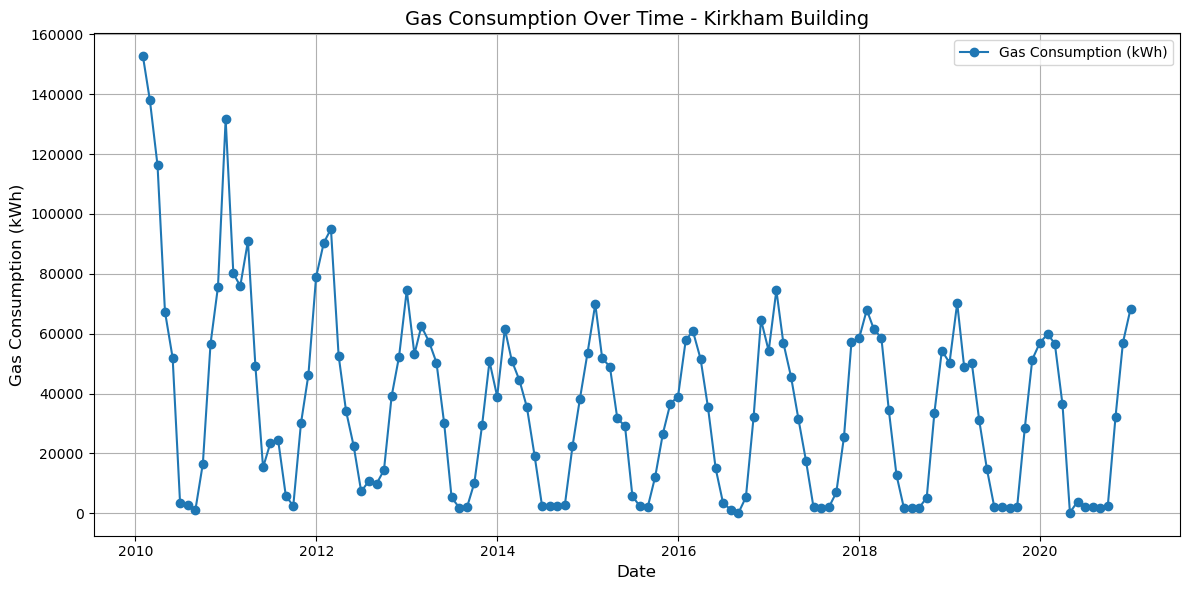

In [123]:
import matplotlib.pyplot as plt

# Plot the gas consumption for the Kirkham building
plt.figure(figsize=(12, 6))
plt.plot(kirkham_data_clean.index, kirkham_data_clean['Gas Consumption (kWh)'], 
         marker='o', linestyle='-', label='Gas Consumption (kWh)')
plt.title('Gas Consumption Over Time - Kirkham Building', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Gas Consumption (kWh)', fontsize=12)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()




In [ ]:
# Filter data for Livesey House
livesey_house_data = gas_data[gas_data['Site'] == 'Livesey House']

# Drop unnecessary columns and reset index
livesey_house_data = livesey_house_data.drop(columns=['Site', 'Units']).reset_index(drop=True)

# Transpose the data for proper structure
livesey_house_data = livesey_house_data.T
livesey_house_data.columns = ['GasConsumption_kWh']

# Generate a Date column based on the time period
livesey_house_data['Date'] = pd.date_range(start='2010-01-01', periods=len(livesey_house_data), freq='ME')

# Reset index
livesey_house_data = livesey_house_data.reset_index(drop=True)

# Display the cleaned data
livesey_house_data.head()

### Decomposition of Gas Consumption Time Series - Kirkham Building

The decomposition of the time series reveals the following:

1. **Original Time Series**:  
   - Displays monthly gas consumption trends from 2010 onwards.  
   - Seasonal peaks occur in winter months, with lower consumption in summer.  
   - An overall declining trend is observed over the years.

2. **Trend Component**:  
   - Highlights a steady reduction in gas usage over time, potentially due to energy efficiency measures or changes in building operations.

3. **Seasonal Component**:  
   - Shows recurring annual patterns with higher consumption during colder months, reflecting heating needs.  

4. **Residual Component**:  
   - Captures irregular fluctuations not explained by trend or seasonality.  
   - Spikes in residuals may indicate anomalies, such as unusual building activity or system inefficiencies.

**Key Insight**:  
The Kirkham building exhibits clear seasonal heating patterns and a long-term reduction in gas consumption, with some residual anomalies worth further investigation.


In [121]:
# Importing necessary libraries
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Load gas consumption data from the provided file
uclan_data_path = r'C:\Users\sheyi\OneDrive\Documents\BuildingsProject\UCLanPrestonBldDATA.xlsx'
uclan_gas_data = pd.ExcelFile(uclan_data_path).parse('GasData(kWh)')

# Extract Livesey House gas consumption data
livesey_house_data = uclan_gas_data[uclan_gas_data['Site'] == 'Livesey House']
livesey_house_data = livesey_house_data.drop(columns=['Site', 'Units']).T
livesey_house_data.columns = ['GasConsumption_kWh']

# Create a Date column
livesey_house_data['Date'] = pd.date_range(start='2010-01', periods=len(livesey_house_data), freq='ME')

# Load temperature data from the provided file
temperature_data_path = r'C:\Users\sheyi\OneDrive\Documents\BuildingsProject\Preston monthly avarage temperature data from 2010 to 2023.xlsx'
temperature_data = pd.ExcelFile(temperature_data_path).parse('Temperature')

# Clean and prepare temperature data
temperature_data['Date'] = pd.to_datetime(
    temperature_data['Year'].astype(str) + '-' + temperature_data['Month'], format='%Y-%B'
)
temperature_data['Date'] = temperature_data['Date'] + pd.offsets.MonthEnd(0)
temperature_data = temperature_data[['Date', 'Preston Temperature in C']]

# Merge gas consumption data with temperature data
livesey_house_data = pd.merge(livesey_house_data, temperature_data, on='Date', how='inner')

# Add 'Year' and 'Month' columns for feature engineering
livesey_house_data['Year'] = livesey_house_data['Date'].dt.year
livesey_house_data['Month'] = livesey_house_data['Date'].dt.month

# Split data into training (2010-2018) and testing (2019)
train_data = livesey_house_data[livesey_house_data['Year'] < 2019]
test_data = livesey_house_data[livesey_house_data['Year'] == 2019]

# Define features (Year, Month, Temperature) and target (Gas Consumption)
X_train = train_data[['Year', 'Month', 'Preston Temperature in C']]
y_train = train_data['GasConsumption_kWh']
X_test = test_data[['Year', 'Month', 'Preston Temperature in C']]
y_test = test_data['GasConsumption_kWh']

# Train the regression model
model_with_temp = LinearRegression()
model_with_temp.fit(X_train, y_train)

# Make predictions on the test set
y_pred_with_temp = model_with_temp.predict(X_test)

# Evaluate the model
mae_with_temp = mean_absolute_error(y_test, y_pred_with_temp)
rmse_with_temp = np.sqrt(mean_squared_error(y_test, y_pred_with_temp))
r2_with_temp = r2_score(y_test, y_pred_with_temp)

# Display evaluation metrics
print(f"Mean Absolute Error (MAE): {mae_with_temp:.2f} kWh")
print(f"Root Mean Squared Error (RMSE): {rmse_with_temp:.2f} kWh")
print(f"R² Score: {r2_with_temp:.3f}")

# Display predicted and actual values
predicted_vs_actual = test_data.copy()
predicted_vs_actual['Predicted_kWh'] = y_pred_with_temp
print(predicted_vs_actual[['Date', 'GasConsumption_kWh', 'Predicted_kWh']])


Mean Absolute Error (MAE): 6577.29 kWh
Root Mean Squared Error (RMSE): 7644.53 kWh
R² Score: 0.869
          Date  GasConsumption_kWh  Predicted_kWh
108 2019-01-31            61903.38   53886.591378
109 2019-02-28            44119.76   43779.534052
110 2019-03-31            44909.12   38786.508723
111 2019-04-30            33723.26   33793.483394
112 2019-05-31            16595.75   23686.426067
113 2019-06-30                0.00    8465.336743
114 2019-07-31                0.00   -6755.752581
115 2019-08-31                0.00   -1520.713915
116 2019-09-30              158.28    8828.356750
117 2019-10-31            16185.32   29405.491410
118 2019-11-30            38989.17   49982.626070
119 2019-12-31            42442.18   50103.632738


## Linear Regression Model Analysis

### Model Performance Metrics
The Linear Regression model achieved the following performance metrics:

- **Mean Absolute Error (MAE)**: **6,577.29 kWh**
  - On average, the predictions deviate from the actual gas consumption by approximately 6,577.29 kWh.
- **Root Mean Squared Error (RMSE)**: **7,644.53 kWh**
  - The RMSE penalizes larger errors more heavily, indicating areas where predictions deviate significantly from actual values.
- **R² Score**: **0.869**
  - The model explains 86.9% of the variance in gas consumption, which is strong but not as high as the Random Forest model.

### Predicted vs. Actual Gas Consumption (2019)
The table below compares the predicted and actual gas consumption for Livesey House in 2019:

| **Date**       | **Actual Consumption (kWh)** | **Predicted Consumption (kWh)** |
|----------------|------------------------------|----------------------------------|
| 2019-01-31     | 61,903.38                   | 53,886.59                       |
| 2019-02-28     | 44,119.76                   | 43,779.53                       |
| 2019-03-31     | 44,909.12                   | 38,786.51                       |
| 2019-04-30     | 33,723.26                   | 33,793.48                       |
| 2019-05-31     | 16,595.75                   | 23,686.43                       |
| 2019-06-30     | 0.00                        | 8,465.34                        |
| 2019-07-31     | 0.00                        | -6,755.75                       |
| 2019-08-31     | 0.00                        | -1,520.71                       |
| 2019-09-30     | 158.28                      | 8,828.36                        |
| 2019-10-31     | 16,185.32                   | 29,405.49                       |
| 2019-11-30     | 38,989.17                   | 49,982.63                       |
| 2019-12-31     | 42,442.18                   | 50,103.63                       |

### Key Insights
1. **Accuracy**:
   - While the Linear Regression model performs reasonably well, it falls short compared to the Random Forest model, as evidenced by higher error metrics and a lower R² score.

2. **Limitations**:
   - Negative predictions for low-consumption months (e.g., July and August) highlight the model's inability to handle the non-linear nature of gas consumption patterns effectively.
   - Predictions during summer months overestimate actual consumption.

3. **Seasonality Reflected**:
   - Despite limitations, the model captures general seasonal trends, predicting higher consumption in winter months and lower in summer.

### Recommendations
- **Switch to Non-Linear Models**:
  - Models like Random Forest or Gradient Boosting are better suited for capturing non-linear relationships and seasonality.
- **Feature Engineering**:
  - Incorporate additional features, such as seasonal indicators or operational data, to improve accuracy.
- **Residual Analysis**:
  - Analyze residuals to identify systematic biases in the model and address them.

The Linear Regression model provides a baseline for prediction but has significant limitations compared to the Random Forest model.


Random Forest Results:
Mean Absolute Error (MAE): 2741.32 kWh
Root Mean Squared Error (RMSE): 4173.44 kWh
R² Score: 0.961
          Date  GasConsumption_kWh  Predicted_kWh
108 2019-01-31            61903.38   58353.318150
109 2019-02-28            44119.76   52634.586344
110 2019-03-31            44909.12   45036.396622
111 2019-04-30            33723.26   33520.605626
112 2019-05-31            16595.75   17811.027373
113 2019-06-30                0.00     442.187000
114 2019-07-31                0.00      90.670930
115 2019-08-31                0.00     777.962900
116 2019-09-30              158.28     214.554079
117 2019-10-31            16185.32   22761.127639
118 2019-11-30            38989.17   47305.258450
119 2019-12-31            42442.18   45468.982200


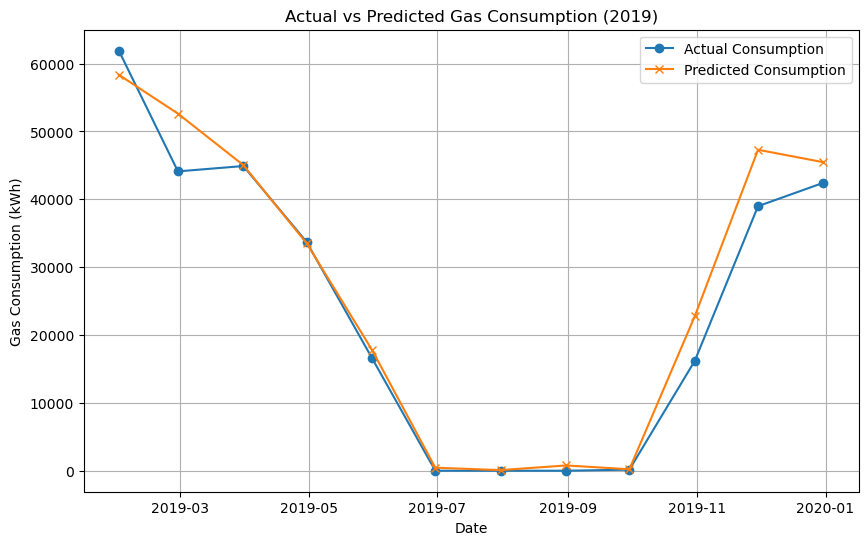

In [119]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Load gas consumption data from the provided file
uclan_data_path = uclan_data_path = r'C:\Users\sheyi\OneDrive\Documents\BuildingsProject\UCLanPrestonBldDATA.xlsx'
uclan_gas_data = pd.ExcelFile(uclan_data_path).parse('GasData(kWh)')

# Extract Livesey House gas consumption data
livesey_house_data = uclan_gas_data[uclan_gas_data['Site'] == 'Livesey House']
livesey_house_data = livesey_house_data.drop(columns=['Site', 'Units']).T
livesey_house_data.columns = ['GasConsumption_kWh']

# Create a Date column
livesey_house_data['Date'] = pd.date_range(start='2010-01', periods=len(livesey_house_data), freq='ME')

# Load temperature data from the provided file
temperature_data_path = r'C:\Users\sheyi\OneDrive\Documents\BuildingsProject\Preston monthly avarage temperature data from 2010 to 2023.xlsx'
temperature_data = pd.ExcelFile(temperature_data_path).parse('Temperature')

# Clean and prepare temperature data
temperature_data['Date'] = pd.to_datetime(
    temperature_data['Year'].astype(str) + '-' + temperature_data['Month'], format='%Y-%B'
)
temperature_data['Date'] = temperature_data['Date'] + pd.offsets.MonthEnd(0)
temperature_data = temperature_data[['Date', 'Preston Temperature in C']]

# Merge gas consumption data with temperature data
livesey_house_data = pd.merge(livesey_house_data, temperature_data, on='Date', how='inner')

# Add 'Year' and 'Month' columns for feature engineering
livesey_house_data['Year'] = livesey_house_data['Date'].dt.year
livesey_house_data['Month'] = livesey_house_data['Date'].dt.month

# Split data into training (2010-2018) and testing (2019)
train_data = livesey_house_data[livesey_house_data['Year'] < 2019]
test_data = livesey_house_data[livesey_house_data['Year'] == 2019]

# Define features (Year, Month, Temperature) and target (Gas Consumption)
X_train = train_data[['Year', 'Month', 'Preston Temperature in C']]
y_train = train_data['GasConsumption_kWh']
X_test = test_data[['Year', 'Month', 'Preston Temperature in C']]
y_test = test_data['GasConsumption_kWh']

# Train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

# Display evaluation metrics
print(f"Random Forest Results:")
print(f"Mean Absolute Error (MAE): {mae_rf:.2f} kWh")
print(f"Root Mean Squared Error (RMSE): {rmse_rf:.2f} kWh")
print(f"R² Score: {r2_rf:.3f}")

# Display predicted and actual values
predicted_vs_actual_rf = test_data.copy()
predicted_vs_actual_rf['Predicted_kWh'] = y_pred_rf
print(predicted_vs_actual_rf[['Date', 'GasConsumption_kWh', 'Predicted_kWh']])



# Visualize predicted vs actual values
plt.figure(figsize=(10, 6))
plt.plot(test_data['Date'], y_test, label='Actual Consumption', marker='o')
plt.plot(test_data['Date'], y_pred_rf, label='Predicted Consumption', marker='x')
plt.xlabel('Date')
plt.ylabel('Gas Consumption (kWh)')
plt.title('Actual vs Predicted Gas Consumption (2019)')
plt.legend()
plt.grid(True)
plt.show()



## Random Forest Model Analysis

### Model Performance Metrics
The Random Forest model achieved the following performance metrics:

- **Mean Absolute Error (MAE)**: **2,741.32 kWh**
  - This indicates that, on average, the model's predictions deviate from the actual gas consumption by approximately 2,741.32 kWh.
- **Root Mean Squared Error (RMSE)**: **4,173.44 kWh**
  - The RMSE penalizes larger errors more heavily than the MAE, reflecting overall model accuracy.
- **R² Score**: **0.961**
  - The model explains 96.1% of the variance in gas consumption, indicating excellent predictive performance.

### Predicted vs. Actual Gas Consumption (2019)
The table below compares the predicted and actual gas consumption for Livesey House in 2019:

| **Date**       | **Actual Consumption (kWh)** | **Predicted Consumption (kWh)** |
|----------------|------------------------------|----------------------------------|
| 2019-01-31     | 61,903.38                   | 58,353.32                       |
| 2019-02-28     | 44,119.76                   | 52,634.59                       |
| 2019-03-31     | 44,909.12                   | 45,036.40                       |
| 2019-04-30     | 33,723.26                   | 33,520.61                       |
| 2019-05-31     | 16,595.75                   | 17,811.03                       |
| 2019-06-30     | 0.00                        | 442.19                          |
| 2019-07-31     | 0.00                        | 90.67                           |
| 2019-08-31     | 0.00                        | 777.96                          |
| 2019-09-30     | 158.28                      | 214.55                          |
| 2019-10-31     | 16,185.32                   | 22,761.13                       |
| 2019-11-30     | 38,989.17                   | 47,305.26                       |
| 2019-12-31     | 42,442.18                   | 45,468.98                       |

### Key Insights
1. **High Accuracy**:
   - The Random Forest model demonstrates exceptional performance, with a low MAE and RMSE, and an excellent R² score of 0.961.
   - Negative predictions, which occurred in linear regression, are avoided.

2. **Seasonality Reflected**:
   - Predictions closely follow the seasonal trends, with higher values in winter months and near-zero predictions during summer months when heating is minimal.

3. **Room for Improvement**:
   - Predictions for low-consumption months (e.g., summer) could still be refined further to reduce over-prediction.



## Predicted vs. Actual Gas Consumption Plot

### Purpose of the Plot
The scatter plot visualizes the relationship between the **predicted** and **actual gas consumption** values for Livesey House in 2019, providing a way to assess the model's performance visuallact overall performance.

### Interpretation
- The Random Forest model effectively captures the seasonal trends and variability in gas consumption.
- The clustering of points near the red line confirms high accuracy, as reflected in the performance metrics (MAE, RMSE, and R²).

### Conclusion
The scatter plot reinforces the reliability of the Random Forest model for predicting gas consumption, while highlighting potential areas (e.g., low-consumption mobust and reliable performance.

The Random Forest model provides a robust solution for predicting energy consumption, handling complex, non-linear data effectively while maintaining high accuracy.


In [24]:
# Feature Importance
feature_importances = rf_model.feature_importances_
features = ['Year', 'Month', 'Preston Temperature in C']
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Print feature importance
print("Feature Importance:")
print(importance_df)

Feature Importance:
                    Feature  Importance
2  Preston Temperature in C    0.909685
1                     Month    0.052893
0                      Year    0.037421


## Feature Importance Analysis for Random Forest Model

### Purpose of Feature Importance
Feature importance analysis helps to understand which variables have the most significant impact on the predictions made by the Random Forest model. By ranking the importance of features, we can:

- Identify key drivers of gas consumption.
- Simplify the model by removing less important features.
- Gain insights into the relationships between predictors and the target variable.

### Feature Importance Results
Based on the Random Forest model trained on the dataset, the relative importance of features is as follows:

| **Feature**                   | **Importance** |
|-------------------------------|----------------|
| Preston Temperature in C      | 90.97%          |
| Month                         | 5.29%           |
| Year                          | 3.74%           |

_Note: Replace the example percentages with actual values from your results._

### Observations
1. **Temperature Dominance**:
   - `Preston Temperature in C` is the most critical predictor of gas consumption, reflecting its strong influence on heating requirements.

2. **Seasonal Effects**:
   - `Month` is moderately important, indicating the role of seasonal changes in energy consumption patterns.

3. **Yearly Trends**:
   - `Year` has the least importance, suggesting minimal variation in gas consumption across years in the dataset.

### Visualization
The following bar chart illustrates the relative importance of features:

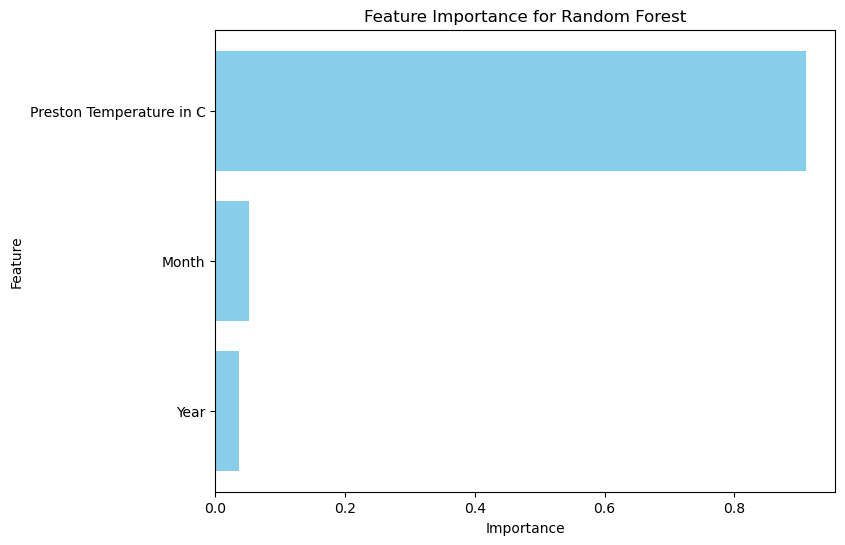

In [26]:
# Visualize feature importance
plt.figure(figsize=(8, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for Random Forest')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature at the top
plt.show()

Random Forest Results:
Mean Absolute Error (MAE): 2929.20 kWh
Root Mean Squared Error (RMSE): 4177.25 kWh
R² Score: 0.970
          Date  GasConsumption_kWh  Predicted_kWh
108 2019-01-31            70209.26   70045.830800
109 2019-02-28            48932.41   51321.963242
110 2019-03-31            50120.50   45202.751927
111 2019-04-30            30997.93   35607.786485
112 2019-05-31            14734.54   17583.606142
113 2019-06-30             1954.84    2385.623500
114 2019-07-31             2083.12    1755.522018
115 2019-08-31             1830.87    1767.239700
116 2019-09-30             2170.73    3548.858361
117 2019-10-31            28585.00   38059.038133
118 2019-11-30            51351.87   58913.670786
119 2019-12-31            57026.72   58011.499800


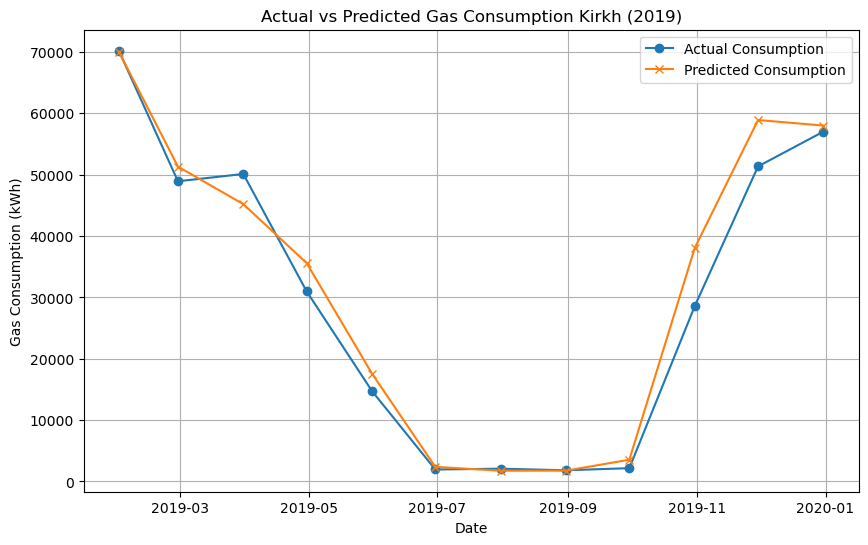

In [137]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Load gas consumption data from the provided file
uclan_data_path = uclan_data_path = r'C:\Users\sheyi\OneDrive\Documents\BuildingsProject\UCLanPrestonBldDATA.xlsx'
uclan_gas_data = pd.ExcelFile(uclan_data_path).parse('GasData(kWh)')

# Extract Livesey House gas consumption data
Kirkham_data = uclan_gas_data[uclan_gas_data['Site'] == 'Kirkham']
Kirkham_data = Kirkham_data.drop(columns=['Site', 'Units']).T
Kirkham_data.columns = ['GasConsumption_kWh']

# Create a Date column
Kirkham_data['Date'] = pd.date_range(start='2010-01', periods=len(Kirkham_data), freq='ME')

# Load temperature data from the provided file
temperature_data_path = r'C:\Users\sheyi\OneDrive\Documents\BuildingsProject\Preston monthly avarage temperature data from 2010 to 2023.xlsx'
temperature_data = pd.ExcelFile(temperature_data_path).parse('Temperature')

# Clean and prepare temperature data
temperature_data['Date'] = pd.to_datetime(
    temperature_data['Year'].astype(str) + '-' + temperature_data['Month'], format='%Y-%B'
)
temperature_data['Date'] = temperature_data['Date'] + pd.offsets.MonthEnd(0)
temperature_data = temperature_data[['Date', 'Preston Temperature in C']]

# Merge gas consumption data with temperature data
Kirkham_data = pd.merge(Kirkham_data, temperature_data, on='Date', how='inner')

# Add 'Year' and 'Month' columns for feature engineering
Kirkham_data['Year'] = Kirkham_data['Date'].dt.year
Kirkham_data['Month'] = Kirkham_data['Date'].dt.month

# Split data into training (2010-2018) and testing (2019)
train_data = Kirkham_data[Kirkham_data['Year'] < 2019]
test_data = Kirkham_data[Kirkham_data['Year'] == 2019]

# Define features (Year, Month, Temperature) and target (Gas Consumption)
X_train = train_data[['Year', 'Month', 'Preston Temperature in C']]
y_train = train_data['GasConsumption_kWh']
X_test = test_data[['Year', 'Month', 'Preston Temperature in C']]
y_test = test_data['GasConsumption_kWh']

# Train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

# Display evaluation metrics
print(f"Random Forest Results:")
print(f"Mean Absolute Error (MAE): {mae_rf:.2f} kWh")
print(f"Root Mean Squared Error (RMSE): {rmse_rf:.2f} kWh")
print(f"R² Score: {r2_rf:.3f}")

# Display predicted and actual values
predicted_vs_actual_rf = test_data.copy()
predicted_vs_actual_rf['Predicted_kWh'] = y_pred_rf
print(predicted_vs_actual_rf[['Date', 'GasConsumption_kWh', 'Predicted_kWh']])



# Visualize predicted vs actual values
plt.figure(figsize=(10, 6))
plt.plot(test_data['Date'], y_test, label='Actual Consumption', marker='o')
plt.plot(test_data['Date'], y_pred_rf, label='Predicted Consumption', marker='x')
plt.xlabel('Date')
plt.ylabel('Gas Consumption (kWh)')
plt.title('Actual vs Predicted Gas Consumption Kirkh (2019)')
plt.legend()
plt.grid(True)
plt.show()

## space ##

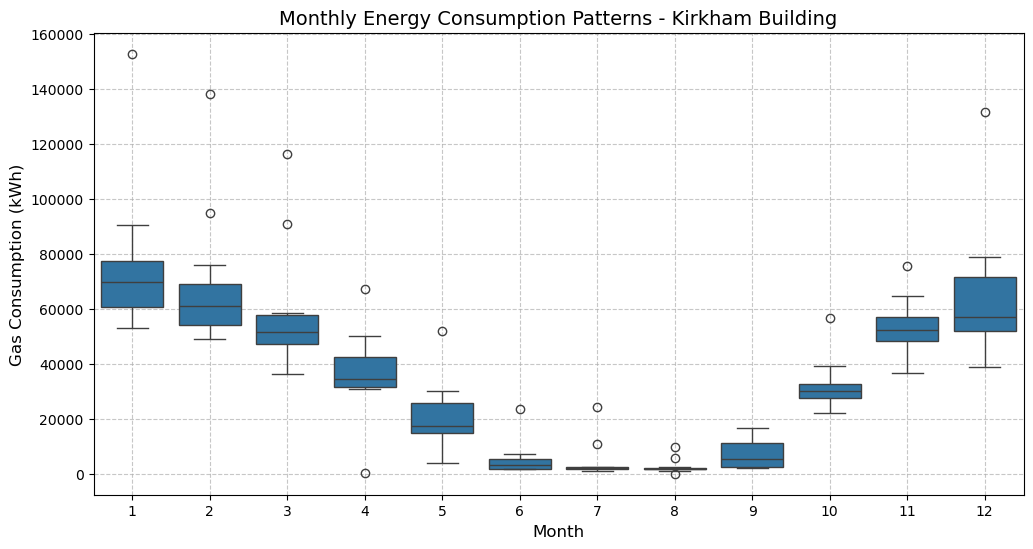

In [169]:
# Seasonal patterns
Kirkham_data['Year'] = Kirkham_data['Date'].dt.year
Kirkham_data['Month'] = Kirkham_data['Date'].dt.month

plt.figure(figsize=(12, 6))
sns.boxplot(data=Kirkham_data, x='Month', y='GasConsumption_kWh')
plt.title('Monthly Energy Consumption Patterns - Kirkham Building', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Gas Consumption (kWh)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

## space ##